In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# reading the csv file
plt.style.use('seaborn-talk')


aero_data = pd.read_csv("aerofit_treadmill.csv")

/tmp/ipykernel_35261/1408985527.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-talk')


In [16]:
x=aero_data.groupby("Product")
x.groups.keys()

dict_keys(['KP281', 'KP481', 'KP781'])

In [4]:
# shape and features

print("There are ",aero_data.shape[0]," entries")
print("There are ",aero_data.shape[1], " features")
print()
print("The features are")
print(list(aero_data.columns))

There are  180  entries
There are  9  features

The features are
['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage', 'Fitness', 'Income', 'Miles']


#### As we can see below there are 3 'string' type features and the remaining 6 are 'int' type

In [5]:
# feature data_types
print("Feature Data Types")
print(aero_data.dtypes)
print()
print(aero_data.dtypes.value_counts())

Feature Data Types
Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

int64     6
object    3
dtype: int64


In [6]:
print("As we can see there are no null values " , aero_data.isnull().sum().sum())


As we can see there are no null values  0


In [7]:
print("The unique product types are -- ")
print(aero_data["Product"].unique())

The unique product types are -- 
['KP281' 'KP481' 'KP781']


**There is information about 3 major products of the company**

###  Clipping Outliers for continous variables

**using q1 - 1.5 * iqr and q3 + 1.5 * iqr to detect outliers**

### Boxplots and outliers before clipping

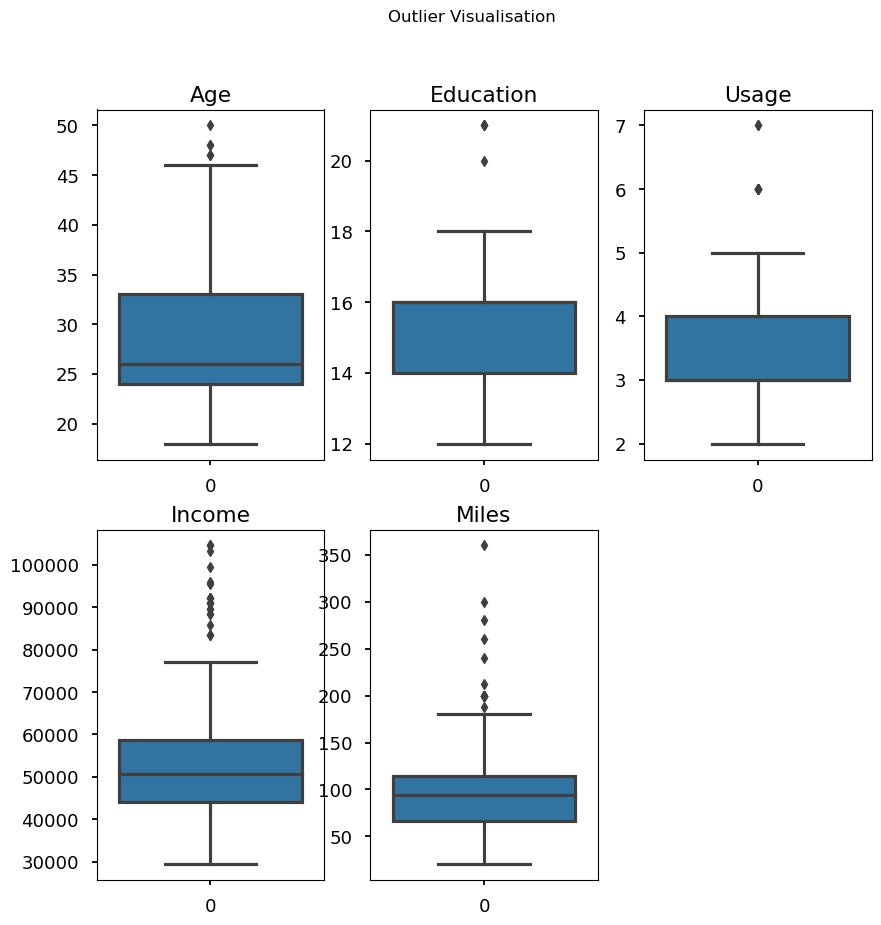

In [8]:
plt.figure(figsize=(10,10))
plt.suptitle("Outlier Visualisation")
plt.subplot(2,3,1)
plt.title("Age")
sns.boxplot(aero_data["Age"])

plt.subplot(2,3,2)
plt.title("Education")
sns.boxplot(aero_data["Education"])

plt.subplot(2,3,3)
plt.title("Usage")
sns.boxplot(aero_data["Usage"])

plt.subplot(2,3,4)
plt.title("Income")
sns.boxplot(aero_data["Income"])

plt.subplot(2,3,5)
plt.title("Miles")
sns.boxplot(aero_data["Miles"])

plt.show()

In [9]:
#Clipping Function defined

def clip_column(col):
    q1 = aero_data[col].quantile(.25)
    q3 = aero_data[col].quantile(.75)

    iqr = q3-q1 

    minimum = int(q1-(1.5*iqr))
    maximum = int(q3+(1.5*iqr))

    return np.clip(aero_data[col],minimum,maximum)

In [10]:
# Clip the columns

aero_data["Age"] = clip_column("Age")
aero_data["Education"] = clip_column("Education")
aero_data["Usage"] = clip_column("Usage")
aero_data["Income"] = clip_column("Income")
aero_data["Miles"] = clip_column("Miles")

### Boxplots after clipping

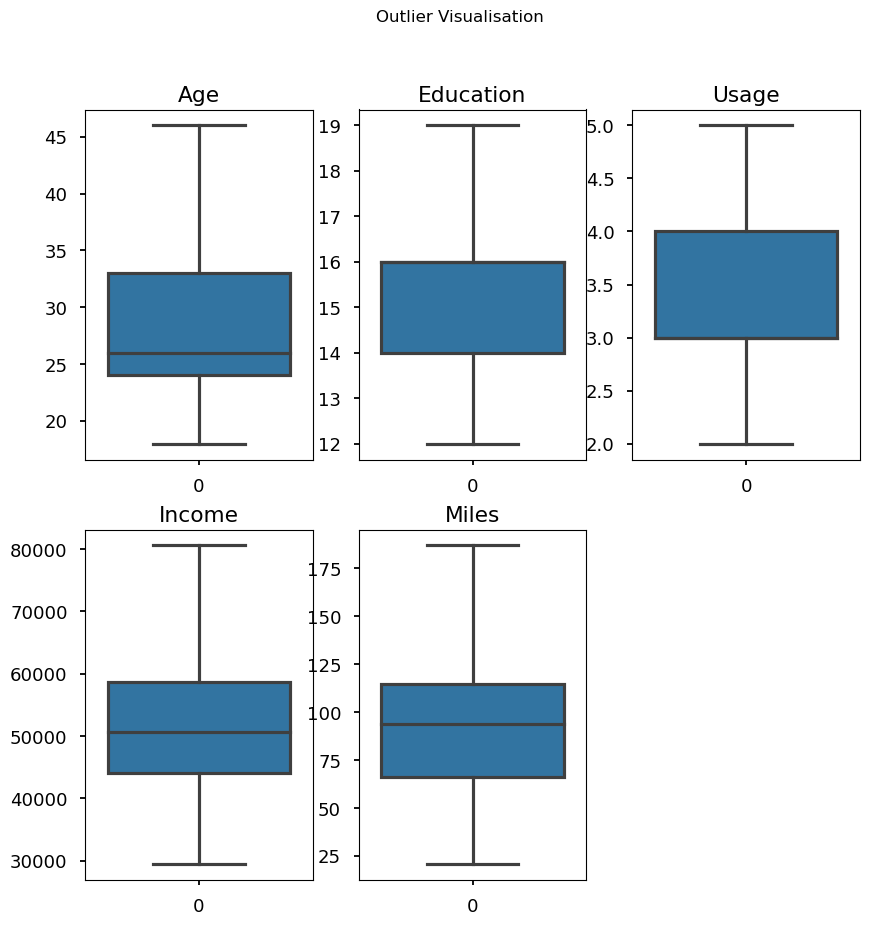

In [11]:
plt.figure(figsize=(10,10))
plt.suptitle("Outlier Visualisation")
plt.subplot(2,3,1)
plt.title("Age")
sns.boxplot(aero_data["Age"])

plt.subplot(2,3,2)
plt.title("Education")
sns.boxplot(aero_data["Education"])

plt.subplot(2,3,3)
plt.title("Usage")
sns.boxplot(aero_data["Usage"])

plt.subplot(2,3,4)
plt.title("Income")
sns.boxplot(aero_data["Income"])

plt.subplot(2,3,5)
plt.title("Miles")
sns.boxplot(aero_data["Miles"])

plt.show()

## Countplots of the categotical features

product


<AxesSubplot: title={'center': 'Product vs Count'}, xlabel='Product', ylabel='count'>

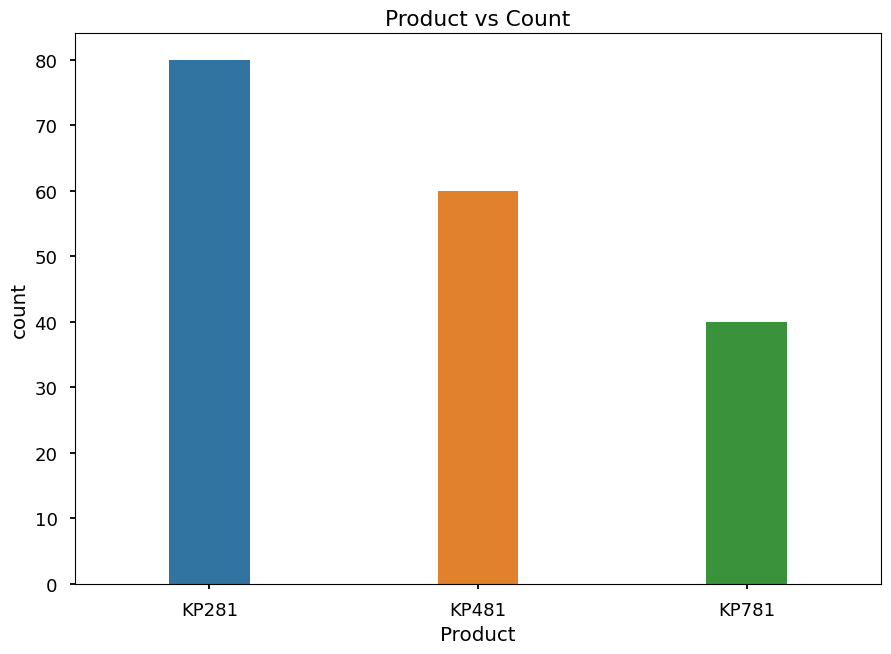

In [12]:
print("product")
plt.title("Product vs Count")
sns.countplot(x="Product",data=aero_data,width=0.3)

#for x in ax.containers:
 #   ax.bar_label(x,)

**KP281** is the most sold product ... **Price** could be the factor 

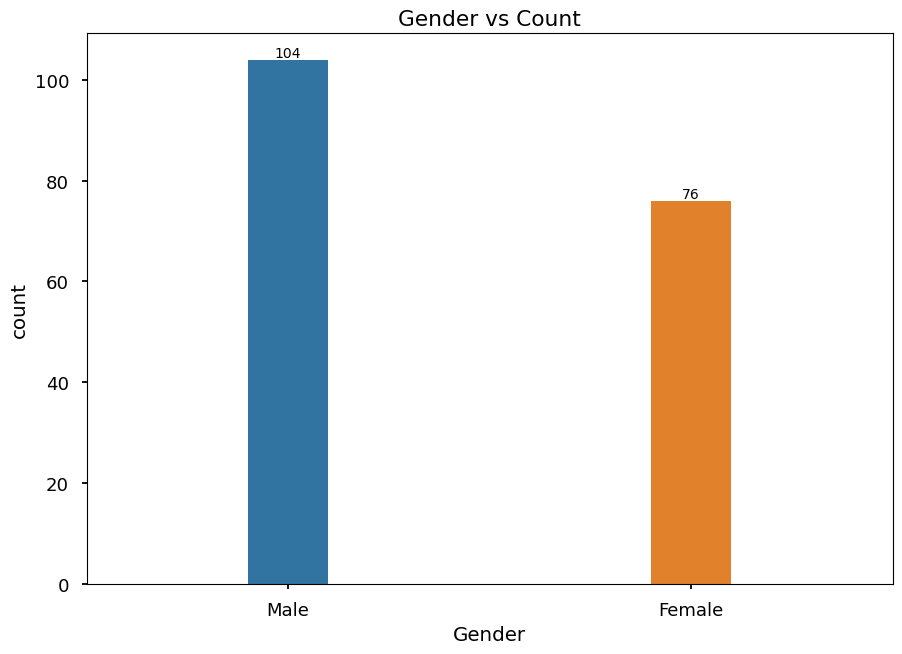

In [13]:
plt.title("Gender vs Count")
ax=sns.countplot(x="Gender",data=aero_data,width=0.2)

for x in ax.containers:
    ax.bar_label(x,)


#### "You can see above that more males--(104) have bought products from the company as compared to females--(76)

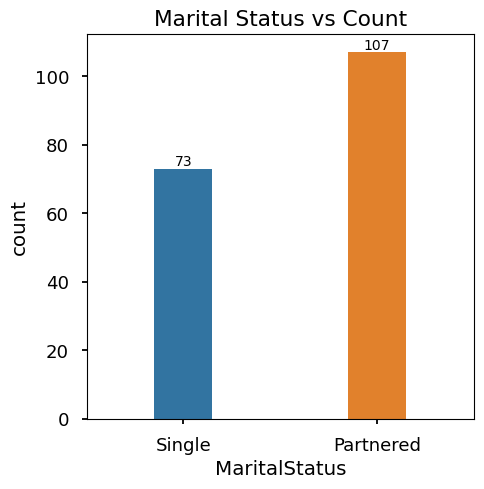

In [14]:
plt.figure(figsize=(5,5))
plt.title("Marital Status vs Count")
ax=sns.countplot(x="MaritalStatus",data=aero_data,width=0.3)

for x in ax.containers:
    ax.bar_label(x,)

As you can see that the **partnered** stratum **(107)** have bought more products than the **single** group **(73)**

### Insight

Generally married people are more mature compared to single people so they are more **health conscious** 

## Comparing categorical variables 

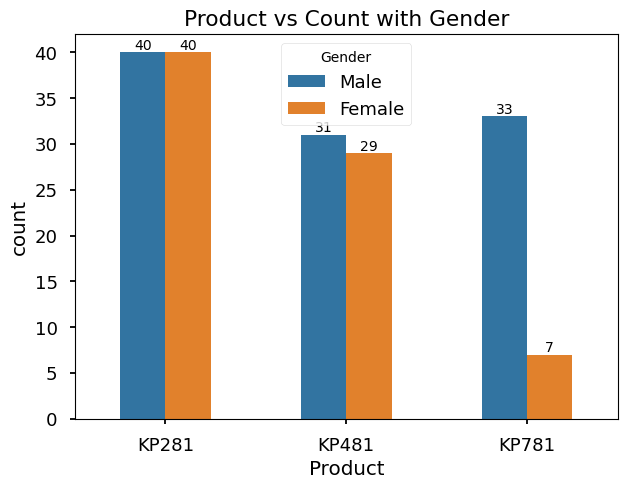

In [15]:
plt.figure(figsize=(7,5))
plt.title("Product vs Count with Gender")
ax=sns.countplot(x="Product",hue="Gender",data=aero_data,width=0.5)

for x in ax.containers:
    ax.bar_label(x,)

### Insight

For the high end product **KP781** - the dominant gender buying the product is Male i.e almost 82% of total product . 
This shows that males are generally more likely to spend on high end fitness products 

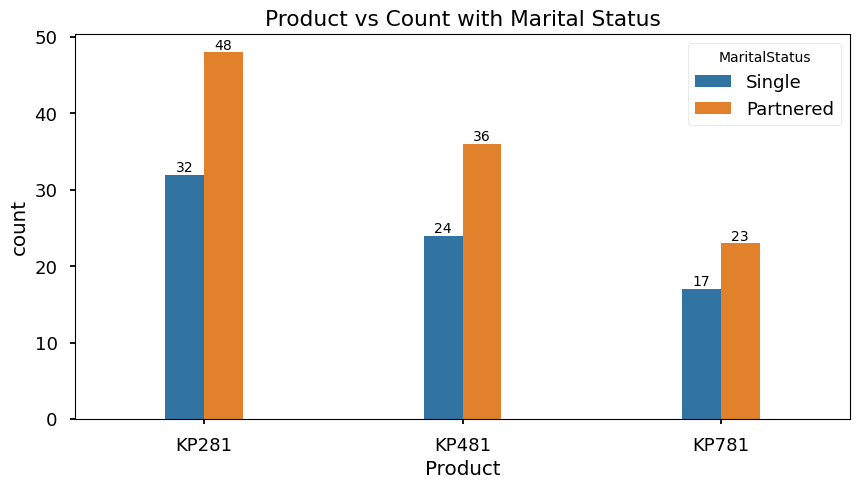

In [16]:
plt.figure(figsize=(10,5))
plt.title("Product vs Count with Marital Status")
ax=sns.countplot(x="Product",hue="MaritalStatus",data=aero_data,width=0.3)

for x in ax.containers:
    ax.bar_label(x,)

#### creating a column ''age-group'' 

In [17]:
aero_data["age_group"]=pd.cut(aero_data["Age"],3,labels=["18-28",'29-39','40-50'])

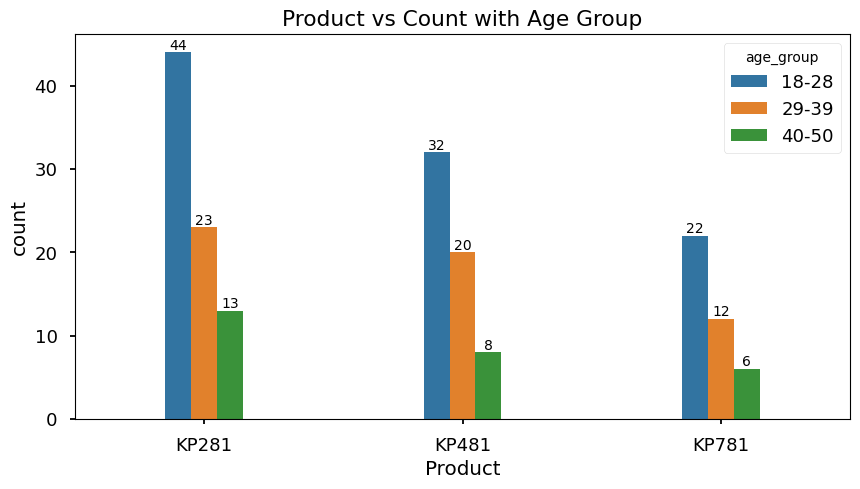

In [18]:
plt.figure(figsize=(10,5))
plt.title("Product vs Count with Age Group")
ax=sns.countplot(x="Product",hue="age_group",data=aero_data,width=.3)

for x in ax.containers:
    ax.bar_label(x,)
    


### Insight

#### The age group ''18-28'' seems to be the top buyer of  all the three products. 

**Targeted advertising for this group**


### Continous Features - EDA

In [19]:
aero_data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group
0,KP281,18,Male,14,Single,3,4,29562,112,18-28
1,KP281,19,Male,15,Single,2,3,31836,75,18-28
2,KP281,19,Female,14,Partnered,4,3,30699,66,18-28
3,KP281,19,Male,12,Single,3,3,32973,85,18-28
4,KP281,20,Male,13,Partnered,4,2,35247,47,18-28


In [20]:
print("Statistics for overall Age")
print()
print(aero_data['Age'].describe())
print()
print("Statistics for 'KP281' Age")
print()
print(aero_data[aero_data['Product']=="KP281"]['Age'].describe())
print()
print("Statistics for 'KP481' Age")
print()
print(aero_data[aero_data['Product']=="KP481"]['Age'].describe())
print()
print("Statistics for 'KP781' Age")
print()
print(aero_data[aero_data['Product']=="KP781"]['Age'].describe())
print()

Statistics for overall Age

count    180.000000
mean      28.733333
std        6.792701
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       46.000000
Name: Age, dtype: float64

Statistics for 'KP281' Age

count    80.000000
mean     28.487500
std       7.051338
min      18.000000
25%      23.000000
50%      26.000000
75%      33.000000
max      46.000000
Name: Age, dtype: float64

Statistics for 'KP481' Age

count    60.000000
mean     28.866667
std       6.552181
min      19.000000
25%      24.000000
50%      26.000000
75%      33.250000
max      46.000000
Name: Age, dtype: float64

Statistics for 'KP781' Age

count    40.000000
mean     29.025000
std       6.772825
min      22.000000
25%      24.750000
50%      27.000000
75%      30.250000
max      46.000000
Name: Age, dtype: float64



In [21]:
print("Statistics for overall Education")
print()
print(aero_data['Education'].describe())
print()
print("Statistics for 'KP281' Education")
print()
print(aero_data[aero_data['Product']=="KP281"]['Education'].describe())
print()
print("Statistics for 'KP481' Education")
print()
print(aero_data[aero_data['Product']=="KP481"]['Education'].describe())
print()
print("Statistics for 'KP781' Education")
print()
print(aero_data[aero_data['Product']=="KP781"]['Education'].describe())
print()

Statistics for overall Education

count    180.000000
mean      15.533333
std        1.507523
min       12.000000
25%       14.000000
50%       16.000000
75%       16.000000
max       19.000000
Name: Education, dtype: float64

Statistics for 'KP281' Education

count    80.000000
mean     15.037500
std       1.216383
min      12.000000
25%      14.000000
50%      16.000000
75%      16.000000
max      18.000000
Name: Education, dtype: float64

Statistics for 'KP481' Education

count    60.000000
mean     15.116667
std       1.222552
min      12.000000
25%      14.000000
50%      16.000000
75%      16.000000
max      18.000000
Name: Education, dtype: float64

Statistics for 'KP781' Education

count    40.000000
mean     17.150000
std       1.311683
min      14.000000
25%      16.000000
50%      18.000000
75%      18.000000
max      19.000000
Name: Education, dtype: float64



In [22]:
print("Statistics for overall Usage")
print()
print(aero_data['Usage'].describe())
print()
print("Statistics for 'KP281' Usage")
print()
print(aero_data[aero_data['Product']=="KP281"]['Usage'].describe())
print()
print("Statistics for 'KP481' Usage")
print()
print(aero_data[aero_data['Product']=="KP481"]['Usage'].describe())
print()
print("Statistics for 'KP781' Usage")
print()
print(aero_data[aero_data['Product']=="KP781"]['Usage'].describe())
print()

Statistics for overall Usage

count    180.000000
mean       3.394444
std        0.948372
min        2.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Usage, dtype: float64

Statistics for 'KP281' Usage

count    80.000000
mean      3.087500
std       0.782624
min       2.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Usage, dtype: float64

Statistics for 'KP481' Usage

count    60.000000
mean      3.066667
std       0.799717
min       2.000000
25%       3.000000
50%       3.000000
75%       3.250000
max       5.000000
Name: Usage, dtype: float64

Statistics for 'KP781' Usage

count    40.0000
mean      4.5000
std       0.5547
min       3.0000
25%       4.0000
50%       5.0000
75%       5.0000
max       5.0000
Name: Usage, dtype: float64



In [23]:
print("Statistics for overall Fitness")
print()
print(aero_data['Fitness'].describe())
print()
print("Statistics for 'KP281' Fitness")
print()
print(aero_data[aero_data['Product']=="KP281"]['Fitness'].describe())
print()
print("Statistics for 'KP481' Fitness")
print()
print(aero_data[aero_data['Product']=="KP481"]['Fitness'].describe())
print()
print("Statistics for 'KP781' Fitness")
print()
print(aero_data[aero_data['Product']=="KP781"]['Fitness'].describe())
print()

Statistics for overall Fitness

count    180.000000
mean       3.311111
std        0.958869
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Fitness, dtype: float64

Statistics for 'KP281' Fitness

count    80.00000
mean      2.96250
std       0.66454
min       1.00000
25%       3.00000
50%       3.00000
75%       3.00000
max       5.00000
Name: Fitness, dtype: float64

Statistics for 'KP481' Fitness

count    60.00000
mean      2.90000
std       0.62977
min       1.00000
25%       3.00000
50%       3.00000
75%       3.00000
max       4.00000
Name: Fitness, dtype: float64

Statistics for 'KP781' Fitness

count    40.000000
mean      4.625000
std       0.667467
min       3.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: Fitness, dtype: float64



In [24]:
print("Statistics for overall Income")
print()
print(aero_data['Income'].describe())
print()
print("Statistics for 'KP281' Income")
print()
print(aero_data[aero_data['Product']=="KP281"]['Income'].describe())
print()
print("Statistics for 'KP481' Income")
print()
print(aero_data[aero_data['Product']=="KP481"]['Income'].describe())
print()
print("Statistics for 'KP781' Income")
print()
print(aero_data[aero_data['Product']=="KP781"]['Income'].describe())
print()

Statistics for overall Income

count      180.000000
mean     52440.150000
std      13488.636674
min      29562.000000
25%      44058.750000
50%      50596.500000
75%      58668.000000
max      80581.000000
Name: Income, dtype: float64

Statistics for 'KP281' Income

count       80.00000
mean     46418.02500
std       9075.78319
min      29562.00000
25%      38658.00000
50%      46617.00000
75%      53439.00000
max      68220.00000
Name: Income, dtype: float64

Statistics for 'KP481' Income

count       60.000000
mean     48973.650000
std       8653.989388
min      31836.000000
25%      44911.500000
50%      49459.500000
75%      53439.000000
max      67083.000000
Name: Income, dtype: float64

Statistics for 'KP781' Income

count       40.000000
mean     69684.150000
std      12532.561092
min      48556.000000
25%      58204.750000
50%      76568.500000
75%      80581.000000
max      80581.000000
Name: Income, dtype: float64



In [25]:
print("Statistics for overall Miles")
print()
print(aero_data['Miles'].describe())
print()
print("Statistics for 'KP281' Miles")
print()
print(aero_data[aero_data['Product']=="KP281"]['Miles'].describe())
print()
print("Statistics for 'KP481' Miles")
print()
print(aero_data[aero_data['Product']=="KP481"]['Miles'].describe())
print()
print("Statistics for 'KP781' Miles")
print()
print(aero_data[aero_data['Product']=="KP781"]['Miles'].describe())
print()

Statistics for overall Miles

count    180.000000
mean      99.811111
std       42.030820
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      187.000000
Name: Miles, dtype: float64

Statistics for 'KP281' Miles

count     80.000000
mean      82.775000
std       28.828157
min       38.000000
25%       66.000000
50%       85.000000
75%       94.000000
max      187.000000
Name: Miles, dtype: float64

Statistics for 'KP481' Miles

count     60.000000
mean      87.516667
std       31.807414
min       21.000000
25%       64.000000
50%       85.000000
75%      106.000000
max      187.000000
Name: Miles, dtype: float64

Statistics for 'KP781' Miles

count     40.000000
mean     152.325000
std       35.184049
min       80.000000
25%      120.000000
50%      160.000000
75%      187.000000
max      187.000000
Name: Miles, dtype: float64



## Graphical Analysis for different features

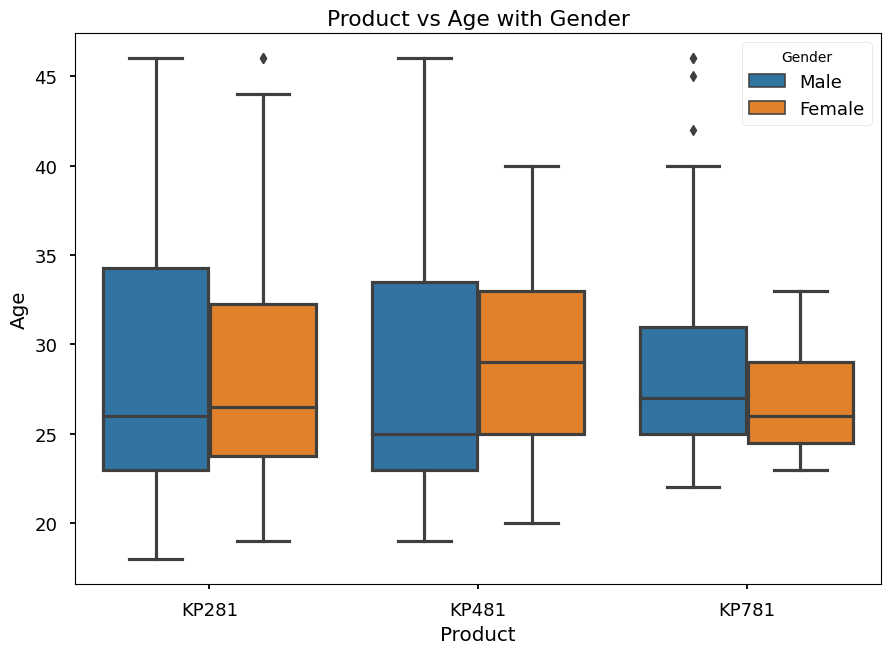

In [26]:
plt.title("Product vs Age with Gender")
sns.boxplot(x="Product",y="Age",hue="Gender",data=aero_data)
plt.show()

### Insight
 
For KP481 the median age of females is higher as compared to other products . Also for **KP481**  there is        a vast difference between **median age of male** and **median age of female**. Older females tend to buy          more of the mid range product.

For all the products most ages are between **23-35** so this demographic should be targeted with incentives and            advertisments

The **IQR** for **KP781** when seen across age is quite less as compared to other products . which means a        specific subset of ages tend to buy the high end product


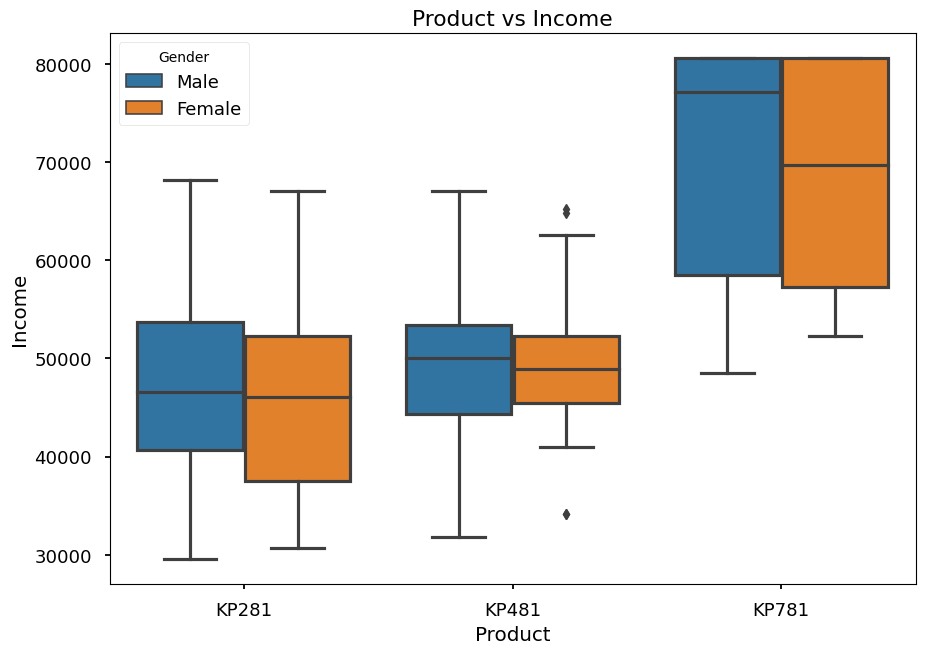

In [27]:
plt.title("Product vs Income")
sns.boxplot(x="Product",y="Income",hue="Gender",data=aero_data)
plt.show()

### Insight
Higher income people tend to buy more of **KP781** as expected .Also the median income is higher for males as compared to females for the high end product



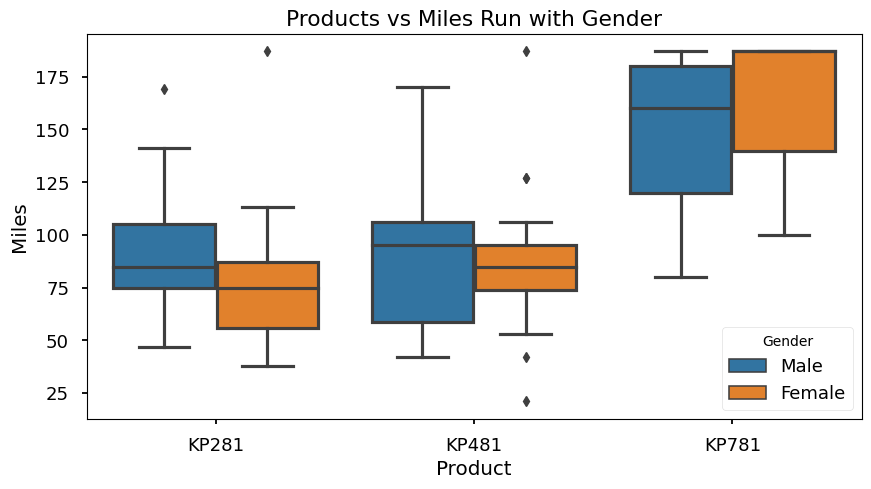

In [28]:
plt.figure(figsize=(10,5))
plt.title("Products vs Miles Run with Gender")
ax=sns.boxplot(x="Product",y="Miles",hue="Gender",data=aero_data)
plt.show()

### Insights

People who own the high end product **KP781** tend to run more as compared to other product owners . This means people who spend more get a better product with higher functionalities . This inturn motivates them to run longer .
The motor used in **KP781** should be designed with more efficiency . And the overall design should be robust and wither-resistant due to the prolonged use of the machine .

Fit people tend to spend more on fitness products

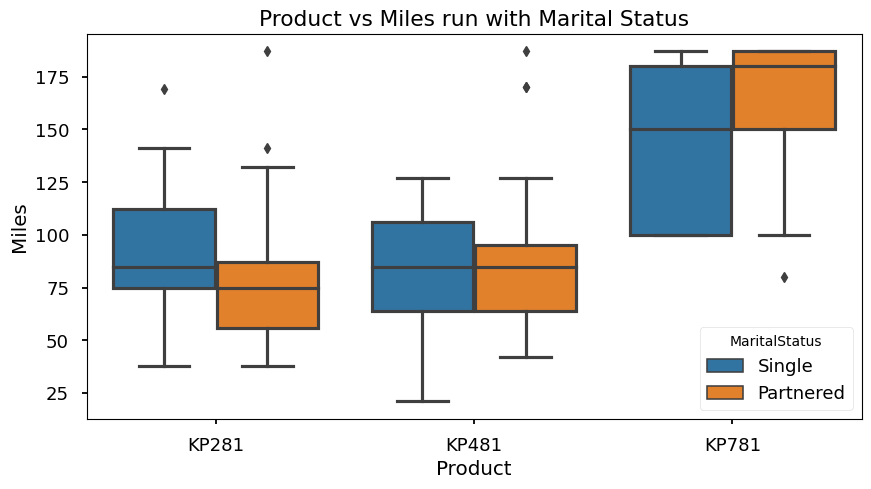

In [29]:
plt.figure(figsize=(10,5))
plt.title("Product vs Miles run with Marital Status")
sns.boxplot(x="Product",y="Miles",hue="MaritalStatus",data=aero_data)
plt.show()

### Insight

    Generally Single people tend to run more than partnered . But in the case of KP871 Partnered people have a higher median . 

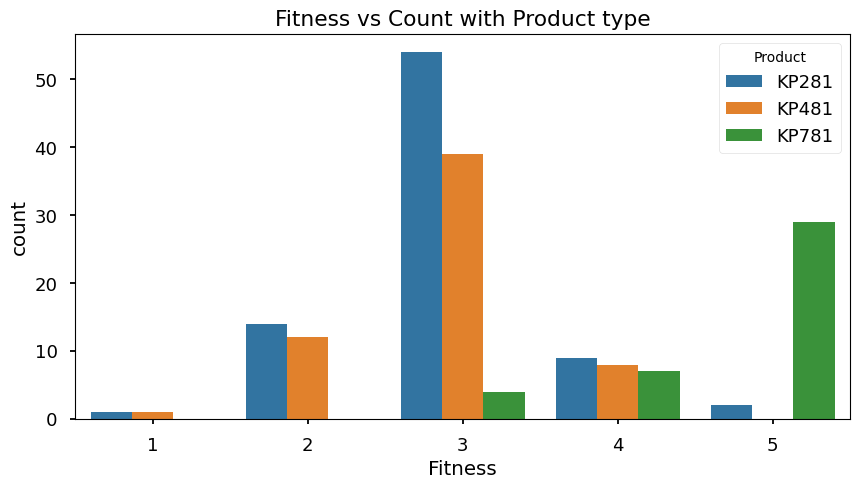

In [30]:
plt.figure(figsize=(10,5))
plt.title("Fitness vs Count with Product type")
sns.countplot(x="Fitness",hue="Product",data=aero_data)
plt.show()

### Insight
Low fitness strata tend to buy low to midrange products . High fitness people tend to buy **KP871**. 

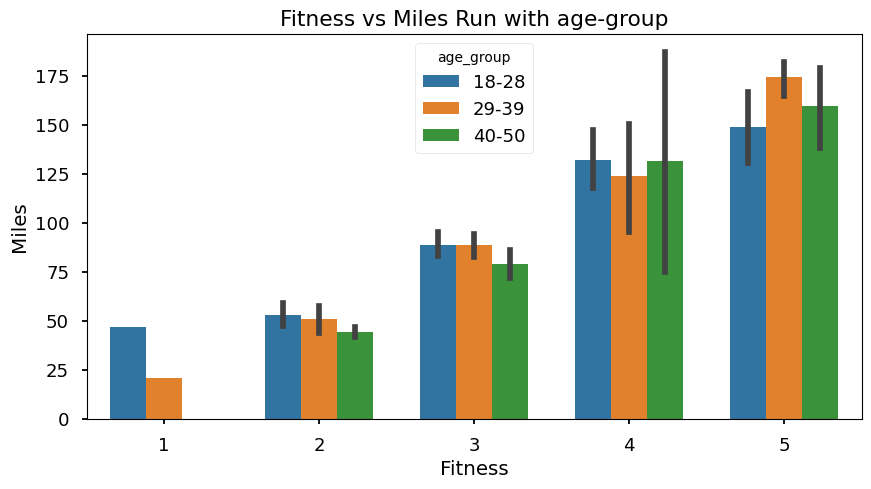

In [31]:
plt.figure(figsize=(10,5))
plt.title("Fitness vs Miles Run with age-group")
sns.barplot(x="Fitness" , y="Miles", hue="age_group",estimator="mean",data=aero_data,width=.7)
plt.show()

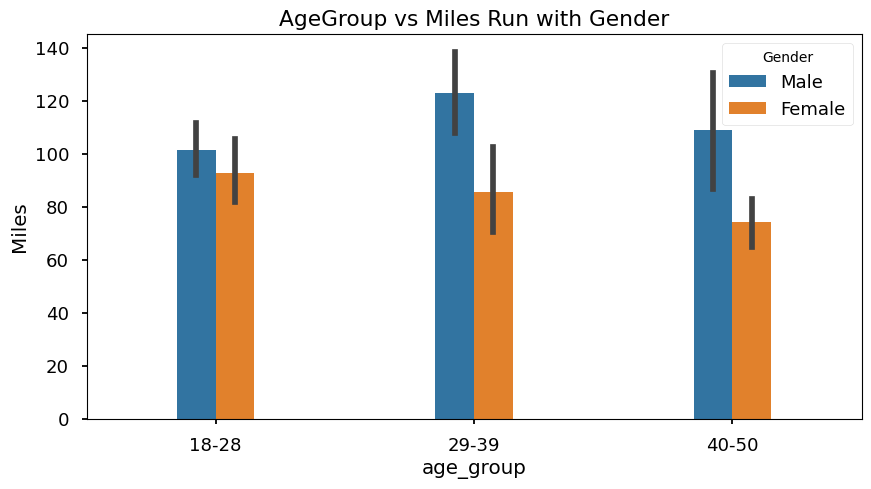

In [32]:
plt.figure(figsize=(10,5))
plt.title("AgeGroup vs Miles Run with Gender")
sns.barplot(x="age_group" , y="Miles", hue="Gender",estimator="mean",data=aero_data,width=0.3)
plt.show()

### Insight
           Generally males have more endurance as compared to females hence miles run by males is higher . 

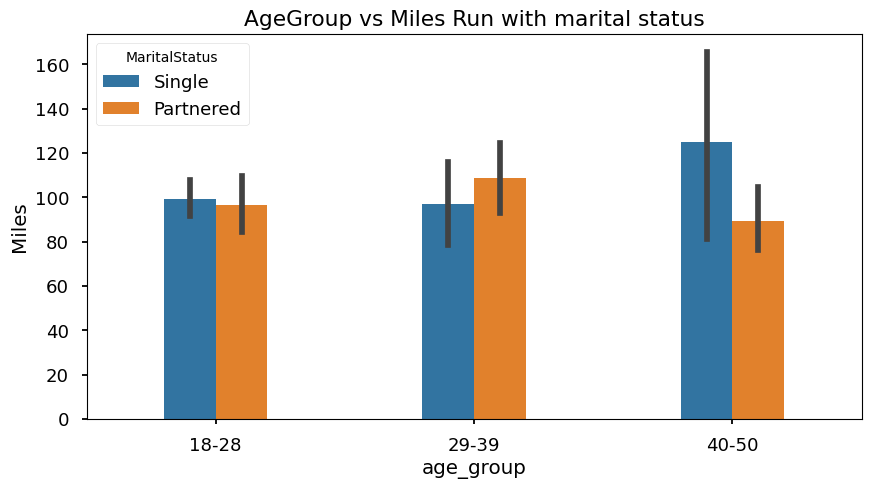

In [33]:
plt.figure(figsize=(10,5))
plt.title("AgeGroup vs Miles Run with marital status")
sns.barplot(x="age_group" , y="Miles", hue="MaritalStatus",estimator="mean",data=aero_data,width=.4)
plt.show()

### Continous Variables Scatterplots

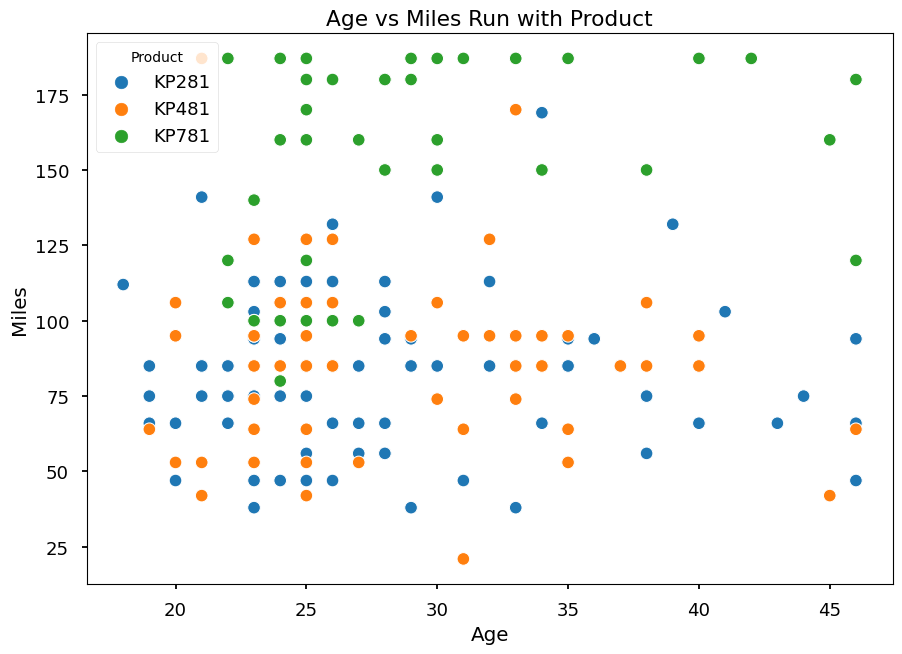

In [34]:
plt.title("Age vs Miles Run with Product")
sns.scatterplot(x="Age",y="Miles",hue="Product",data=aero_data)
plt.show()

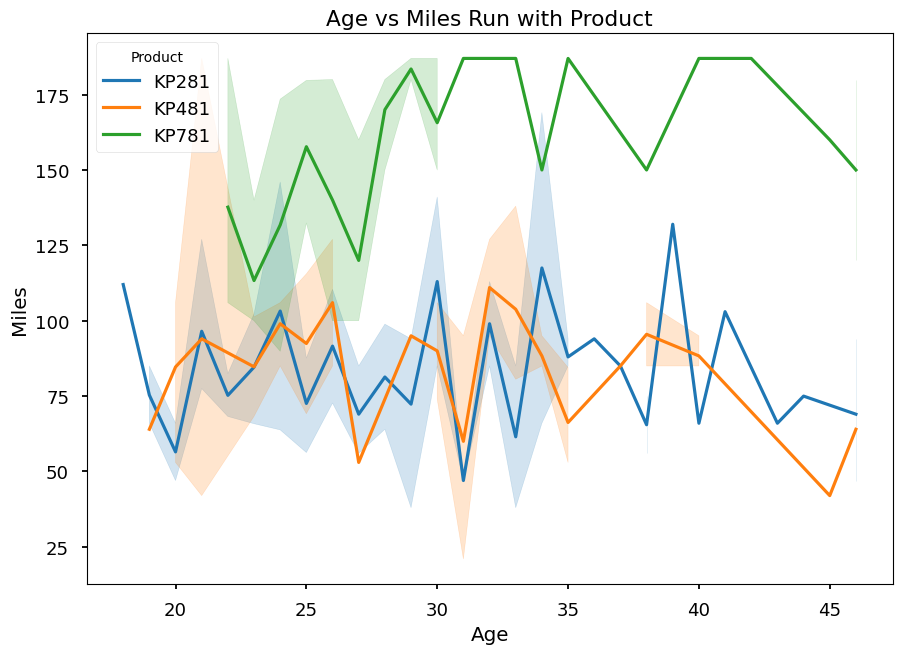

In [35]:
plt.title("Age vs Miles Run with Product")
sns.lineplot(x="Age",y="Miles",hue="Product",data=aero_data)
plt.show()

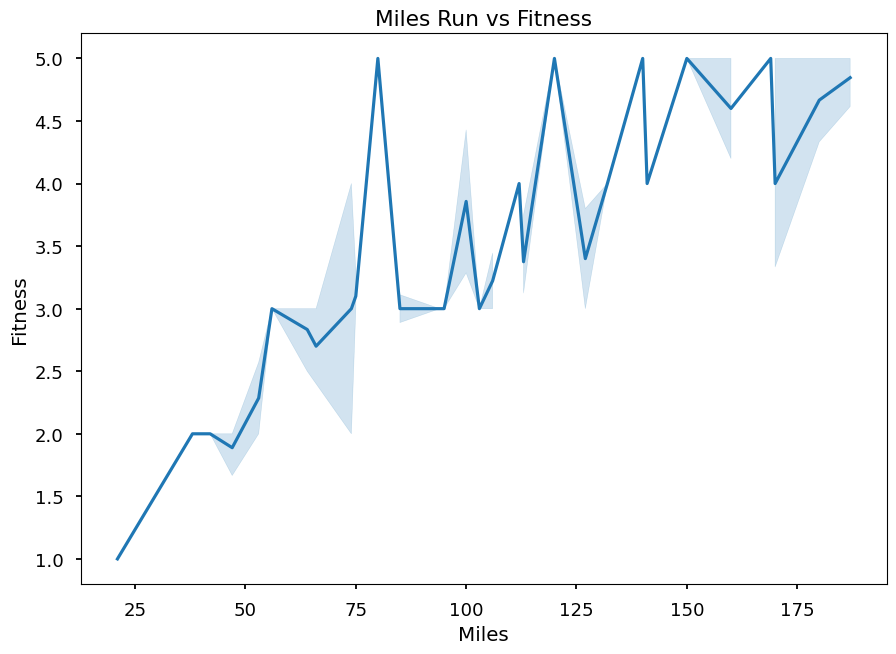

In [36]:
plt.title("Miles Run vs Fitness")
sns.lineplot(x="Miles",y="Fitness" ,data=aero_data)
plt.show()

### Insight 

higher the fitness .. higher the miles you run  

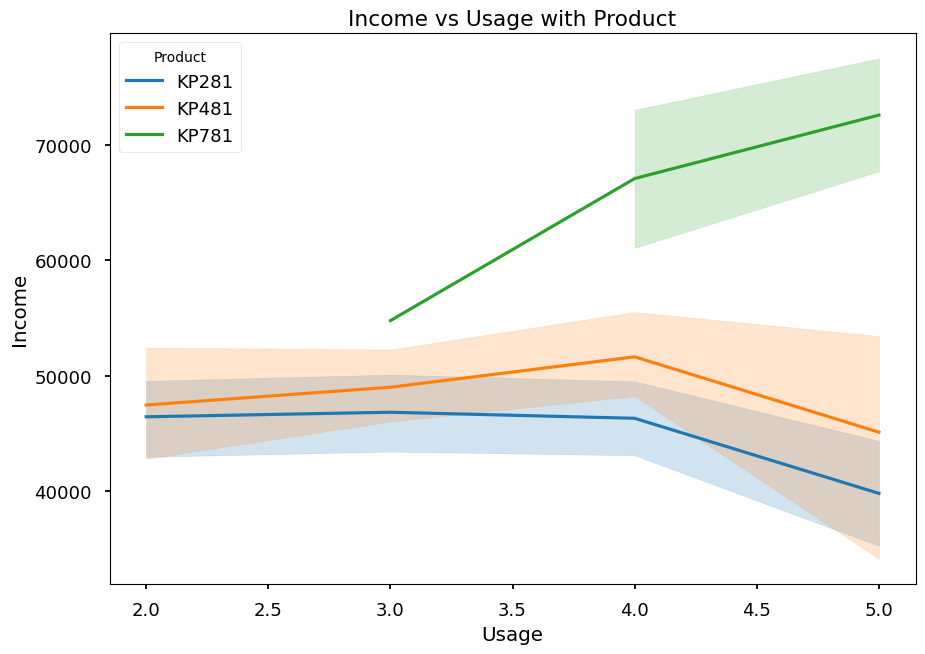

In [37]:
plt.title("Income vs Usage with Product")
sns.lineplot(x="Usage",y="Income",hue="Product",data=aero_data)
plt.show()

### Insight
        for some reason, for the high end product KP781 as the customers income increases the usage increases. 
 
 **We could conclude that people who tend to spend more tend to utilise the product more**

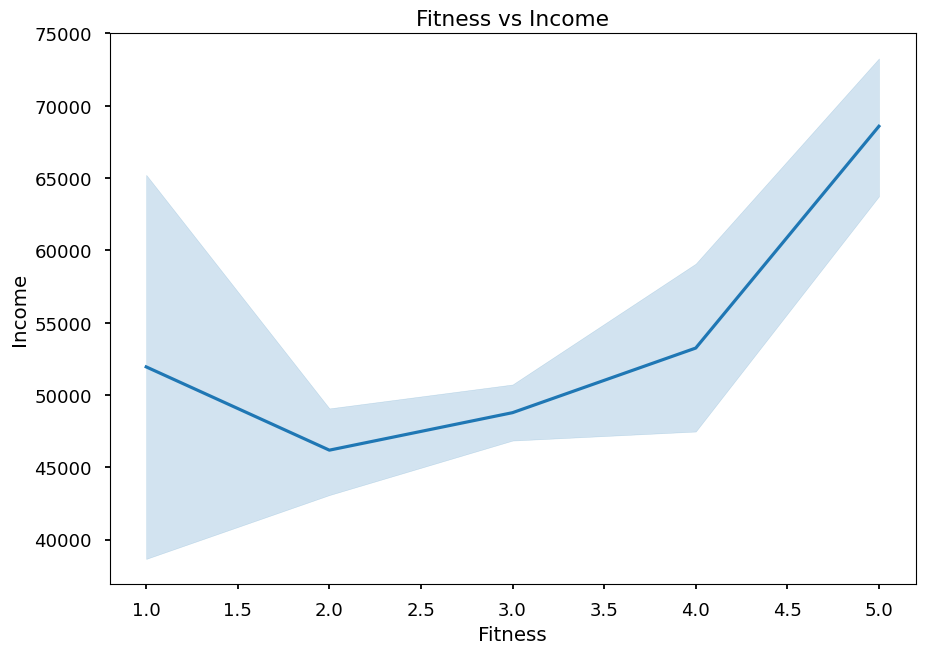

In [38]:
plt.title("Fitness vs Income")
sns.lineplot(x="Fitness",y="Income",data=aero_data)
plt.show()

# Probabilistic Analysis

### **Marginal Product**

In [39]:
k=pd.crosstab(aero_data["Product"],aero_data["Gender"],margins=True)


In [40]:
print("The probability for 'KP281' P(kp281) = ",(k["All"].iloc[0]/k["All"].iloc[3]).round(2))
print()
print("The probability for 'KP481' P(kp481) = ",(k["All"].iloc[1]/k["All"].iloc[3]).round(2))
print()
print("The probability for 'KP781' P(kp781) = ",(k["All"].iloc[2]/k["All"].iloc[3]).round(2))

The probability for 'KP281' P(kp281) =  0.44

The probability for 'KP481' P(kp481) =  0.33

The probability for 'KP781' P(kp781) =  0.22


### **Product and Gender**

In [41]:
k=pd.crosstab(aero_data["Product"],aero_data["Gender"],margins=True)
k

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


**Joint - Female**

In [42]:
print("The probability that it's KP281'and female P(kp281 n 'F') = ",(k["Female"].iloc[0]/k["All"].iloc[3]).round(2))
print()
print("The probability that it's KP481'and female P(kp481 n 'F') = ",(k["Female"].iloc[1]/k["All"].iloc[3]).round(2))
print()
print("The probability that it's KP781'and female P(kp781 n 'F') = ",(k["Female"].iloc[2]/k["All"].iloc[3]).round(2))



The probability that it's KP281'and female P(kp281 n 'F') =  0.22

The probability that it's KP481'and female P(kp481 n 'F') =  0.16

The probability that it's KP781'and female P(kp781 n 'F') =  0.04


**Posterior - Female**

In [43]:
print("The probability that it's KP281' given Female P(kp281 | 'F') = ",(k["Female"].iloc[0]/k["Female"].iloc[3]).round(2))
print()
print("The probability that it's KP481' given Female P(kp481 | 'F') = ",(k["Female"].iloc[1]/k["Female"].iloc[3]).round(2))
print()
print("The probability that it's KP781' given Female P(kp781 | 'F') = ",(k["Female"].iloc[2]/k["Female"].iloc[3]).round(2))


The probability that it's KP281' given Female P(kp281 | 'F') =  0.53

The probability that it's KP481' given Female P(kp481 | 'F') =  0.38

The probability that it's KP781' given Female P(kp781 | 'F') =  0.09


**Joint - Male**

In [44]:
print("The probability that it's KP281'and Male P(kp281 n 'M') = ",(k["Male"].iloc[0]/k["All"].iloc[3]).round(2))
print()
print("The probability that it's KP481'and Male P(kp481 n 'M') = ",(k["Male"].iloc[1]/k["All"].iloc[3]).round(2))
print()
print("The probability that it's KP781'and Male P(kp781 n 'M') = ",(k["Male"].iloc[2]/k["All"].iloc[3]).round(2))



The probability that it's KP281'and Male P(kp281 n 'M') =  0.22

The probability that it's KP481'and Male P(kp481 n 'M') =  0.17

The probability that it's KP781'and Male P(kp781 n 'M') =  0.18


**Posterior - Male**

In [45]:
print("The probability that it's KP281' given Male P(kp281 | 'M') = ",(k["Male"].iloc[0]/k["Male"].iloc[3]).round(2))
print()
print("The probability that it's KP481' given Male P(kp481 | 'M') = ",(k["Male"].iloc[1]/k["Male"].iloc[3]).round(2))
print()
print("The probability that it's KP781' given Male P(kp781 | 'M') = ",(k["Male"].iloc[2]/k["Male"].iloc[3]).round(2))



The probability that it's KP281' given Male P(kp281 | 'M') =  0.38

The probability that it's KP481' given Male P(kp481 | 'M') =  0.3

The probability that it's KP781' given Male P(kp781 | 'M') =  0.32


### Product and Marital Status

In [46]:
k = pd.crosstab(aero_data["Product"],aero_data['MaritalStatus'],margins=True)
k

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


**Joint - Single**

In [47]:
print("The probability that it's KP281'and Single P(kp281 n 'Single') = ",(k["Single"].iloc[0]/k["All"].iloc[3]).round(2))
print()
print("The probability that it's KP481'and Single P(kp481 n 'Single') = ",(k["Single"].iloc[1]/k["All"].iloc[3]).round(2))
print()
print("The probability that it's KP781'and Single P(kp781 n 'Single') = ",(k["Single"].iloc[2]/k["All"].iloc[3]).round(2))



The probability that it's KP281'and Single P(kp281 n 'Single') =  0.18

The probability that it's KP481'and Single P(kp481 n 'Single') =  0.13

The probability that it's KP781'and Single P(kp781 n 'Single') =  0.09


**Posterior - Single**

In [48]:
print("The probability that it's KP281' given Single P(kp281 | 'Single') = ",(k["Single"].iloc[0]/k["Single"].iloc[3]).round(2))
print()
print("The probability that it's KP481' given Single P(kp481 | 'Single') = ",(k["Single"].iloc[1]/k["Single"].iloc[3]).round(2))
print()
print("The probability that it's KP781' given Single P(kp781 | 'Single') = ",(k["Single"].iloc[2]/k["Single"].iloc[3]).round(2))



The probability that it's KP281' given Single P(kp281 | 'Single') =  0.44

The probability that it's KP481' given Single P(kp481 | 'Single') =  0.33

The probability that it's KP781' given Single P(kp781 | 'Single') =  0.23


**Joint - Partnered**

In [49]:
print("The probability that it's KP281'and Partnered P(kp281 n 'Partnered') = ",(k["Partnered"].iloc[0]/k["All"].iloc[3]).round(2))
print()
print("The probability that it's KP481'and Partnered P(kp481 n 'Partnered') = ",(k["Partnered"].iloc[1]/k["All"].iloc[3]).round(2))
print()
print("The probability that it's KP781'and Partnered P(kp781 n 'Partnered') = ",(k["Partnered"].iloc[2]/k["All"].iloc[3]).round(2))



The probability that it's KP281'and Partnered P(kp281 n 'Partnered') =  0.27

The probability that it's KP481'and Partnered P(kp481 n 'Partnered') =  0.2

The probability that it's KP781'and Partnered P(kp781 n 'Partnered') =  0.13


**Posterior - Partnered**

In [50]:
print("The probability that it's KP281' given Partnered P(kp281 | 'Partnered') = ",(k["Partnered"].iloc[0]/k["Partnered"].iloc[3]).round(2))
print()
print("The probability that it's KP481' given Partnered P(kp481 | 'Partnered') = ",(k["Partnered"].iloc[1]/k["Partnered"].iloc[3]).round(2))
print()
print("The probability that it's KP781' given Partnered P(kp781 | 'Partnered') = ",(k["Partnered"].iloc[2]/k["Partnered"].iloc[3]).round(2))



The probability that it's KP281' given Partnered P(kp281 | 'Partnered') =  0.45

The probability that it's KP481' given Partnered P(kp481 | 'Partnered') =  0.34

The probability that it's KP781' given Partnered P(kp781 | 'Partnered') =  0.21


### make a new categorical feature called income_group having values 'low' 'medium' 'high'

In [51]:
aero_data["income_group"]=pd.cut(aero_data["Income"],3,labels=["low","medium","high"])

### Product and Income-Group

['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']


<AxesSubplot: >

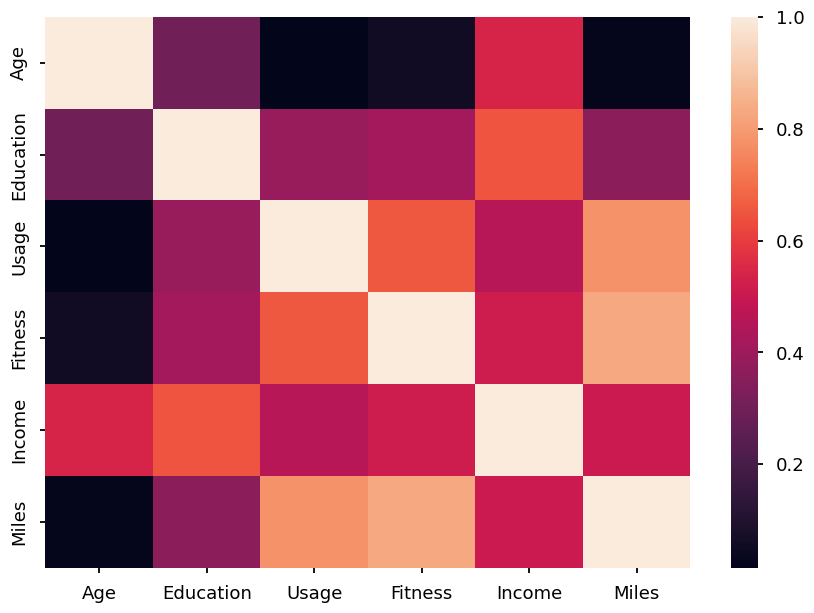

In [85]:
k = pd.crosstab(aero_data["Product"],aero_data["income_group"],margins=True)
l=[]
for x in range(len(aero_data.dtypes)):
    if aero_data.dtypes[x]=='int64':
        l.append(aero_data.dtypes.index[x])
print(l)

sns.heatmap(aero_data[l].corr())

**joint - low_income**

In [53]:
print("The probability that it's KP281'and low_income P(kp281 n 'low_income') = ",(k["low"].iloc[0]/k["All"].iloc[3]).round(2))
print()
print("The probability that it's KP481'and low_income P(kp481 n 'low_income') = ",(k["low"].iloc[1]/k["All"].iloc[3]).round(2))
print()
print("The probability that it's KP781'and low_income P(kp781 n 'low_income') = ",(k["low"].iloc[2]/k["All"].iloc[3]).round(2))



The probability that it's KP281'and low_income P(kp281 n 'low_income') =  0.22

The probability that it's KP481'and low_income P(kp481 n 'low_income') =  0.13

The probability that it's KP781'and low_income P(kp781 n 'low_income') =  0.0


**posterior - low_income**

In [54]:
print("The probability that it's KP281' given low_income P(kp281 | 'low_income') = ",(k["low"].iloc[0]/k["low"].iloc[3]).round(2))
print()
print("The probability that it's KP481' given low_income P(kp481 | 'low_income') = ",(k["low"].iloc[1]/k["low"].iloc[3]).round(2))
print()
print("The probability that it's KP781' given low_income P(kp781 | 'low_income') = ",(k["low"].iloc[2]/k["low"].iloc[3]).round(2))



The probability that it's KP281' given low_income P(kp281 | 'low_income') =  0.62

The probability that it's KP481' given low_income P(kp481 | 'low_income') =  0.38

The probability that it's KP781' given low_income P(kp781 | 'low_income') =  0.0


**joint - medium_income**

In [55]:
print("The probability that it's KP281'and medium_income P(kp281 n 'medium_income') = ",(k["medium"].iloc[0]/k["All"].iloc[3]).round(2))
print()
print("The probability that it's KP481'and medium_income P(kp481 n 'medium_income') = ",(k["medium"].iloc[1]/k["All"].iloc[3]).round(2))
print()
print("The probability that it's KP781'and medium_income P(kp781 n 'medium_income') = ",(k["medium"].iloc[2]/k["All"].iloc[3]).round(2))



The probability that it's KP281'and medium_income P(kp281 n 'medium_income') =  0.21

The probability that it's KP481'and medium_income P(kp481 n 'medium_income') =  0.18

The probability that it's KP781'and medium_income P(kp781 n 'medium_income') =  0.08


**posterior - medium_income**

In [56]:
print("The probability that it's KP281' given medium_income P(kp281 | 'medium_income') = ",(k["medium"].iloc[0]/k["medium"].iloc[3]).round(2))
print()
print("The probability that it's KP481' given medium_income P(kp481 | 'medium_income') = ",(k["medium"].iloc[1]/k["medium"].iloc[3]).round(2))
print()
print("The probability that it's KP781' given medium_income P(kp781 | 'medium_income') = ",(k["medium"].iloc[2]/k["medium"].iloc[3]).round(2))



The probability that it's KP281' given medium_income P(kp281 | 'medium_income') =  0.45

The probability that it's KP481' given medium_income P(kp481 | 'medium_income') =  0.38

The probability that it's KP781' given medium_income P(kp781 | 'medium_income') =  0.17


**joint - high_income**

In [57]:
print("The probability that it's KP281'and high_income P(kp281 n 'high_income') = ",(k["high"].iloc[0]/k["All"].iloc[3]).round(2))
print()
print("The probability that it's KP481'and high_income P(kp481 n 'high_income') = ",(k["high"].iloc[1]/k["All"].iloc[3]).round(2))
print()
print("The probability that it's KP781'and high_income P(kp781 n 'high_income') = ",(k["high"].iloc[2]/k["All"].iloc[3]).round(2))



The probability that it's KP281'and high_income P(kp281 n 'high_income') =  0.02

The probability that it's KP481'and high_income P(kp481 n 'high_income') =  0.02

The probability that it's KP781'and high_income P(kp781 n 'high_income') =  0.14


**posterior - high_income**

In [58]:
print("The probability that it's KP281' given high_income P(kp281 | 'high_income') = ",(k["high"].iloc[0]/k["high"].iloc[3]).round(2))
print()
print("The probability that it's KP481' given high_income P(kp481 | 'high_income') = ",(k["high"].iloc[1]/k["high"].iloc[3]).round(2))
print()
print("The probability that it's KP781' given high_income P(kp781 | 'high_income') = ",(k["high"].iloc[2]/k["high"].iloc[3]).round(2))


The probability that it's KP281' given high_income P(kp281 | 'high_income') =  0.09

The probability that it's KP481' given high_income P(kp481 | 'high_income') =  0.12

The probability that it's KP781' given high_income P(kp781 | 'high_income') =  0.79


#### Fitness category is 1.2.3.4.5 ... lets group them into low medium and high for easy analysis

In [59]:
aero_data["fitness_group"]=pd.cut(aero_data['Fitness'],3,labels=['low','medium','high'])

### Product and Fitness

In [60]:
k = pd.crosstab(aero_data['Product'],aero_data['fitness_group'],margins=True)
k

fitness_group,low,medium,high,All
Product,,,,
KP281,15,54,11,80
KP481,13,39,8,60
KP781,0,4,36,40
All,28,97,55,180


**joint - low_fitness**

In [61]:
print("The probability that it's KP281'and low_fitness P(kp281 n 'low_fitness') = ",(k["low"].iloc[0]/k["All"].iloc[3]).round(2))
print()
print("The probability that it's KP481'and low_fitness P(kp481 n 'low_fitness') = ",(k["low"].iloc[1]/k["All"].iloc[3]).round(2))
print()
print("The probability that it's KP781'and low_fitness P(kp781 n 'low_fitness') = ",(k["low"].iloc[2]/k["All"].iloc[3]).round(2))



The probability that it's KP281'and low_fitness P(kp281 n 'low_fitness') =  0.08

The probability that it's KP481'and low_fitness P(kp481 n 'low_fitness') =  0.07

The probability that it's KP781'and low_fitness P(kp781 n 'low_fitness') =  0.0


**posterior - low_fitness**

In [62]:
print("The probability that it's KP281' given low_fitness P(kp281 | 'low_fitness') = ",(k["low"].iloc[0]/k["low"].iloc[3]).round(2))
print()
print("The probability that it's KP481' given low_fitness P(kp481 | 'low_fitness') = ",(k["low"].iloc[1]/k["low"].iloc[3]).round(2))
print()
print("The probability that it's KP781' given low_fitness P(kp781 | 'low_fitness') = ",(k["low"].iloc[2]/k["low"].iloc[3]).round(2))



The probability that it's KP281' given low_fitness P(kp281 | 'low_fitness') =  0.54

The probability that it's KP481' given low_fitness P(kp481 | 'low_fitness') =  0.46

The probability that it's KP781' given low_fitness P(kp781 | 'low_fitness') =  0.0


**joint - medium_fitness**

In [63]:
print("The probability that it's KP281'and medium_fitness P(kp281 n 'medium_fitness') = ",(k["medium"].iloc[0]/k["All"].iloc[3]).round(2))
print()
print("The probability that it's KP481'and medium_fitness P(kp481 n 'medium_fitness') = ",(k["medium"].iloc[1]/k["All"].iloc[3]).round(2))
print()
print("The probability that it's KP781'and medium_fitness P(kp781 n 'medium_fitness') = ",(k["medium"].iloc[2]/k["All"].iloc[3]).round(2))



The probability that it's KP281'and medium_fitness P(kp281 n 'medium_fitness') =  0.3

The probability that it's KP481'and medium_fitness P(kp481 n 'medium_fitness') =  0.22

The probability that it's KP781'and medium_fitness P(kp781 n 'medium_fitness') =  0.02


**posterior - medium_fitness**

In [64]:
print("The probability that it's KP281' given medium_fitness P(kp281 | 'medium_fitness') = ",(k["medium"].iloc[0]/k["medium"].iloc[3]).round(2))
print()
print("The probability that it's KP481' given medium_fitness P(kp481 | 'medium_fitness') = ",(k["medium"].iloc[1]/k["medium"].iloc[3]).round(2))
print()
print("The probability that it's KP781' given medium_fitness P(kp781 | 'medium_fitness') = ",(k["medium"].iloc[2]/k["medium"].iloc[3]).round(2))



The probability that it's KP281' given medium_fitness P(kp281 | 'medium_fitness') =  0.56

The probability that it's KP481' given medium_fitness P(kp481 | 'medium_fitness') =  0.4

The probability that it's KP781' given medium_fitness P(kp781 | 'medium_fitness') =  0.04


**joint - high_fitness**

In [65]:
print("The probability that it's KP281'and high_fitness P(kp281 n 'high_fitness') = ",(k["high"].iloc[0]/k["All"].iloc[3]).round(2))
print()
print("The probability that it's KP481'and high_fitness P(kp481 n 'high_fitness') = ",(k["high"].iloc[1]/k["All"].iloc[3]).round(2))
print()
print("The probability that it's KP781'and high_fitness P(kp781 n 'high_fitness') = ",(k["high"].iloc[2]/k["All"].iloc[3]).round(2))



The probability that it's KP281'and high_fitness P(kp281 n 'high_fitness') =  0.06

The probability that it's KP481'and high_fitness P(kp481 n 'high_fitness') =  0.04

The probability that it's KP781'and high_fitness P(kp781 n 'high_fitness') =  0.2


**posterior - high_fitness**

In [66]:
print("The probability that it's KP281' given high_fitness P(kp281 | 'high_fitness') = ",(k["high"].iloc[0]/k["high"].iloc[3]).round(2))
print()
print("The probability that it's KP481' given high_fitness P(kp481 | 'high_fitness') = ",(k["high"].iloc[1]/k["high"].iloc[3]).round(2))
print()
print("The probability that it's KP781' given high_fitness P(kp781 | 'high_fitness') = ",(k["high"].iloc[2]/k["high"].iloc[3]).round(2))


The probability that it's KP281' given high_fitness P(kp281 | 'high_fitness') =  0.2

The probability that it's KP481' given high_fitness P(kp481 | 'high_fitness') =  0.15

The probability that it's KP781' given high_fitness P(kp781 | 'high_fitness') =  0.65


# Customer Profile for each Product

### Product - KP281

**Gender - Females tend to buy more of this product with a conditional probability of .53**

**Marital Status does not have an effect on this product**

**Low income people are buying more of this product due to cost constraints with a conditionl probability of .6**

**Miles run on this product is the lowest with a mean of 82**

### Product - KP481

**Gender - Females tend to buy more of this product with a conditional probability of .53**

**Marital Status does not have an effect on this product**

**Low income people are buying more of this product due to cost constraints with a conditionl probability of .6**

**Miles run on this product is the lowest with a mean of 82**

### Product - KP781

**Gender - Males are the dominant group buying this product with very few females**

**Marital Status does not have an effect on this product**

**High income people are buying more of this prodct with 75% of high income customers**

**Miles run on this product is very high with a mean of 153**

**The firness level of customers usin this product is high with more than 65% fit customers buying this product**